In [238]:
###Implement K-mean Algorithm
from sklearn import preprocessing
import numpy as np
import pandas as pd
import copy
from numpy.linalg import norm

In [239]:
def find_cluster(df, k, centers):
    
    #if isinstance(df, pd.DataFrame):
    #    print("this is a df")
    #else:
    #    print("not a df, exit")
        
    # normalize it
    df = preprocessing.scale(df)
    
    data_c_arr= {}
    
    for n in range(len(df)):
        c_num=0  ##cluster number
        ###find smallest distance to k centers and the center number
        d_arr = []
        for i in range(k):
            d = norm(df[n] - centers[i])
            d_arr.append(d)
        c_num = d_arr.index(min(d_arr))
        ## data n belongs to cluster c_num
        data_c_arr[n] = c_num
    return data_c_arr

def find_centers(df,data_c_arr,k):

    data_c = {}
    column = []
    ##get new centers
    for i in range(k):
        data_c[i] = []
    for j in range(len(df[0])):
        column.append(j)
    ##clusters: data_c[0], data_c[1]...data_c[k]
    for n in range(len(data_c_arr)):
        data_c[data_c_arr[n]].append(df[n])
    center_new = {}
    for i in range(k):
        df_n = pd.DataFrame(data_c[i],columns=column)
        center_new[i] = df_n.mean()
    return center_new

def get_cluster_len(data_c_arr,k):
    data_c = {}
    for i in range(k):
        data_c[i] = []
    for n in range(len(data_c_arr)):
        data_c[data_c_arr[n]].append(1)
    ##cluster length
    c_length = []
    for i in range(k):
        c_length.append(len(data_c[i]))
    return c_length

def my_kmean(df, k):
    ##df should be a DataFrame
    if isinstance(df, pd.DataFrame):
        print("this is a DataFrame")
    else:
        print("not a DataFrame, exit")
    
    # normalize it
    df = preprocessing.scale(df)
    
    ##D dimention 
    d = len(df[0])
    
    ##ramdomly generate k centers to start
    centers = {}
    for i in range(k):
        c = np.random.rand(d, 1)
        centers[i] = c
    
    ##find clusters based on centers
    data_c_arr = find_cluster(df,k,centers)
    
    length = get_cluster_len(data_c_arr,k)
    ##while(true):
    for i in range(10):
        centers_new = find_centers(df, data_c_arr, k)
        data_c_arr_new =  find_cluster(df, k, centers_new)
        length_new = get_cluster_len(data_c_arr_new,k)
        diff = 0
        for i in range(len(length_new)):
            diff = abs(length[i]-length_new[i]) + diff
        print("debug diff: ", diff)
        if(diff / len(df) < 0.05):
            ##print("very small diff, return already!")
            print("length_new", length_new)
            ##return centers_new
            return data_c_arr_new
        ##print("length", length)
        ##print("length_new", length_new)
        length=[]
        length = length_new[:]
        
        data_c_arr =[]
        data_c_arr = copy.copy(data_c_arr_new)
    ##return centers_new
    return data_c_arr_new

if __name__ == '__main__':
    iris_df = pd.DataFrame()
    iris_df = pd.read_csv('iris.csv')
    #df = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]
    df = iris_df[['sepal_length','petal_width']]

    
    data_cluster = my_kmean(df, 3)
    #print(data_cluster)
    data_c = {}
    for i in range(3):
        data_c[i] = []
    np_df = df.as_matrix()
    for n in range(len(data_cluster)):
        data_c[data_c_arr[n]].append(np_df[n])

this is a DataFrame
debug diff:  62
debug diff:  20
debug diff:  8
debug diff:  4
length_new [56, 54, 40]


In [240]:
##get values from data_cluster dict to form lables
labels = []
for v in (data_cluster.values()):
    labels.append(v)
from numpy import array
label_arr = array(labels)
print(label_arr)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 1 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 1 0 2 0 2 0 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


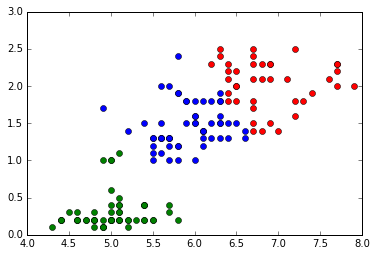

In [241]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
for i in range(3):
    row_index = label_arr==i
    ds = df.loc[row_index]
    plt.plot(ds.iloc[:,0],ds.iloc[:,1],'o') 
plt.axis([4, 8, 0, 3])
plt.show()


In [242]:
from sklearn.cluster import KMeans
df1 = iris_df[['sepal_length','petal_width']]
my_Kmeans = KMeans(n_clusters=3)
my_Kmeans.fit(df1)
label_clustered = my_Kmeans.labels_
print(label_clustered)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 2 1 0 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 1 2 0 2 0 2 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 0 0
 0 2]


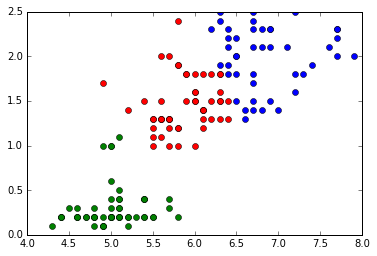

In [243]:
for i in range(3):
    row_index = label_clustered==i
    ds = df1.loc[row_index]
    plt.plot(ds.iloc[:,0],ds.iloc[:,1],'o')
plt.show()

In [244]:
'''
The result from my_kmean function is very close to the result by Kmean from sklearn.cluster
'''

'\nThe result from my_kmean function is very close to the result by Kmean from sklearn.cluster\n'